# 📊 Analisi e Predizione del Churn nel settore Telecomunicazioni

## Introduzione
In questo progetto analizziamo il dataset "Telco Customer Churn" per comprendere le dinamiche di abbandono dei clienti (Churn) e sviluppare strategie di ritenzione basate sui dati.

### Obiettivi del Progetto
L'analisi si pone i seguenti obiettivi strategici:
1.  **Analisi dei Fattori:** Identificare quali variabili (demografiche, contrattuali, di servizio) influenzano maggiormente la decisione di abbandonare l'azienda.
2.  **Segmentazione (Clustering):** Raggruppare i clienti in profili omogenei per mirare meglio le campagne marketing.
3.  **Predizione (Modellazione):** Sviluppare un modello di Machine Learning capace di prevedere se un cliente abbandonerà.

### Specifiche Tecniche
Il progetto è sviluppato in **Python** utilizzando le seguenti librerie per l'analisi dati e la visualizzazione:
* **Data Manipulation:** `Pandas`, `NumPy`
* **Visualization:** `Matplotlib`, `Seaborn` (con palette personalizzata ad alto contrasto)
* **Machine Learning:** `Scikit-Learn` (K-Means per il Clustering, Logistic Regression per la Classificazione)

## Struttura dell'Analisi
Il notebook segue questo flusso logico:
1. **Data Cleaning (pulizia):** Gestione valori nulli e conversione tipi di dato.
2. **EDA (Exploratory Data Analysis):** Analisi statistica e visuale delle distribuzioni.
3. **Clustering (profilazione):** Segmentazione non supervisionata per trovare profili nascosti.
4. **Modellazione (conclusioni strategiche):** Addestramento e valutazione del modello predittivo.

---

## Setup Ambiente, Librerie, Dataset 


In [1]:
# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Configurazione stile grafici
sns.set(style="whitegrid")
%matplotlib inline

# Caricamento Dataset
try:
    df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print(f"Dataset caricato correttamente: {df.shape[0]} righe, {df.shape[1]} colonne")
except FileNotFoundError:
    print("Errore: File non trovato. Assicurati che il file sia in '../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'")

df.head()

print("Librerie caricate e dataset pronto.")

Dataset caricato correttamente: 7043 righe, 21 colonne
Librerie caricate e dataset pronto.


---

## 1. Data Cleaning (Pulizia dei Dati)

**Obiettivo:** Preparare il dataset per l'analisi rimuovendo le incoerenze, gestendo i valori mancanti e correggendo i tipi di dato.

**Script di Analisi:**
1.  controllo preliminare della strutura dati, tipi e valori nulli.
2.  Conversione della colonna `TotalCharges` da stringa a numerico (gestione errori di conversione).
3.  Rimozione dei valori nulli e della colonna identificativa `customerID` (inutile ai fini predittivi).

### 1.1 Analisi dei dati

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Osservazione:** Notiamo che la colonna `TotalCharges` è di tipo `object` (stringa), mentre dovrebbe essere numerica (`float`). Questo suggerisce la presenza di caratteri non numerici (spesso spazi vuoti) che devono essere gestiti.

### 1.2 Conversione dei dati

In [3]:
# 'coerce' trasforma le stringhe vuote o con spazi in NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### 1.3 Sistemazione dataset

In [4]:
# Contiamo quanti valori nulli sono stati generati
nulli = df['TotalCharges'].isnull().sum()
print(f"Valori nulli trovati in 'TotalCharges': {nulli}")

# Rimuoviamo le righe con valori nulli
df.dropna(inplace=True)

# Il CustomerID è univoco e non porta informazione statistica
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

print(f"Dimensioni dopo la pulizia: {df.shape}")
df.head()

Valori nulli trovati in 'TotalCharges': 11
Dimensioni dopo la pulizia: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

## 2. Exploratory Data Analysis (EDA)

**Obiettivo:** Esplorare visivamente le relazioni tra le caratteristiche dei clienti e il tasso di abbandono.

### 2.1 Analisi della variabile target (tasso di abbandono)
Prima di tutto, analizziamo la distribuzione della variabile che vogliamo prevedere: il **Churn** (Abbandono).

È fondamentale capire se il dataset è bilanciato (numero simile di clienti che abbandonano e che rimangono) o sbilanciato. Dataset fortemente sbilanciati possono influenzare negativamente le prestazioni dei modelli di classificazione, portandoli a predire sempre la classe maggioritaria.

**Obiettivo visivo:** Vogliamo capire a colpo d'occhio se il dataset è bilanciato.
Per facilitare la lettura di *tutti* i grafici successivi, adotteremo questa convenzione cromatica:
* 🔴 **Rosso (Churn = Yes):** Clienti che hanno abbandonato.
* 🟢 **Verde (Churn = No):** Clienti fedeli.

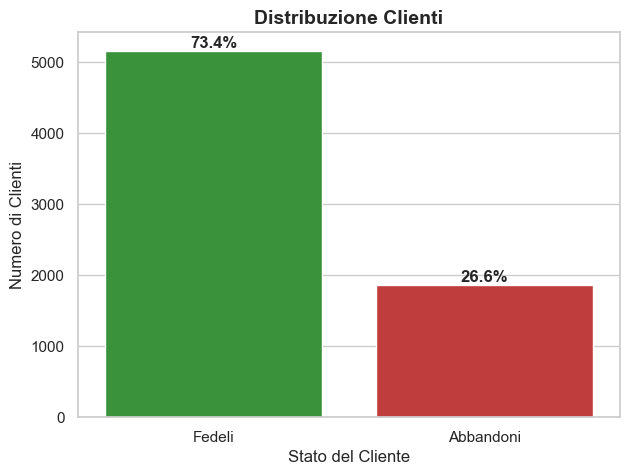

In [5]:
churn_palette = {"Abbandoni": "#D62728", "Fedeli": "#2CA02C"}
plt.figure(figsize=(7, 5))

# Mappiamo i valori per il grafico senza modificare il dataframe originale
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].map({'No': 'Fedeli', 'Yes': 'Abbandoni'})
ax = sns.countplot(x='Churn', hue='Churn', data=df_plot, palette=churn_palette, legend=False)

plt.title('Distribuzione Clienti', fontsize=14, fontweight='bold')
plt.xlabel('Stato del Cliente', fontsize=12)
plt.ylabel('Numero di Clienti', fontsize=12)

# Percentuali sulle barre
total = len(df_plot)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

***Risultato: Sbilanciamento Significativo***
Il grafico parla chiaro:
* Il **26.5%** dei clienti (barra Rossa) ha abbandonato.
* Il **73.5%** (barra Verde) è rimasto fedele.

Non siamo di fronte a uno sbilanciamento estremo (come nelle frodi finanziarie), ma è sufficiente a richiedere attenzione.

### 2.2 Analisi della Fedeltà (Durata)
Analizziamo ora la "vita" del cliente (`tenure` = mesi di permanenza).

**Obiettivo visivo:** Utilizziamo un istogramma "impilato" (stacked). Se vediamo una grande area rossa all'inizio dell'asse X (0 mesi), significa che i clienti scappano subito. Se il verde cresce verso destra, significa che la fedeltà paga.

**Domanda di Business:** Esiste un "periodo critico" iniziale in cui il rischio di abbandono è più alto?

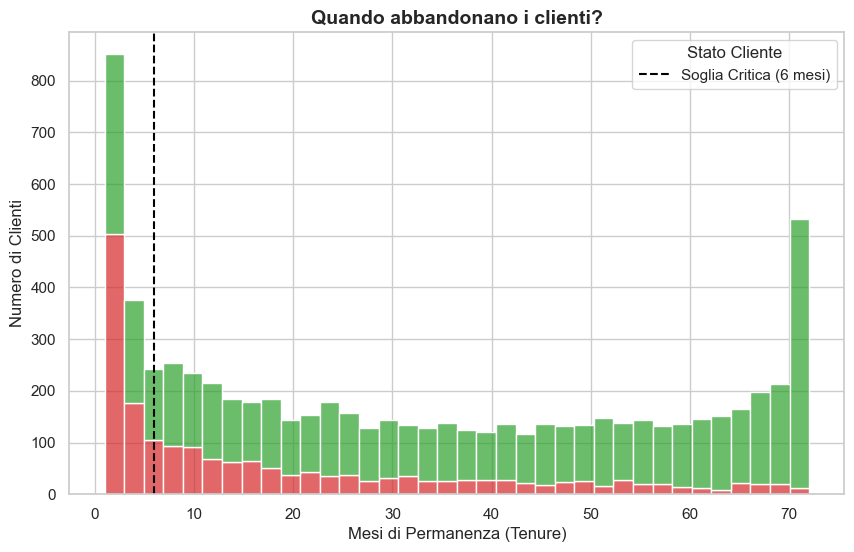

In [17]:
churn_palette = {"Abbandoni": "#D62728", "Fedeli": "#2CA02C"}
plt.figure(figsize=(10, 6))

# Mappiamo i valori per il grafico senza modificare il dataframe originale
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].map({'No': 'Fedeli', 'Yes': 'Abbandoni'})

sns.histplot(data=df_plot, x='tenure', hue='Churn', multiple='stack', palette=churn_palette, bins=36, alpha=0.7)
plt.title('Quando abbandonano i clienti?', fontsize=14, fontweight='bold')
plt.xlabel('Mesi di Permanenza (Tenure)', fontsize=12)
plt.ylabel('Numero di Clienti', fontsize=12)

# Linea verticale per evidenziare i 6 mesi
plt.axvline(x=6, color='black', linestyle='--', label='Soglia Critica (6 mesi)')
plt.legend(title='Stato Cliente');

***Risultato: La Fase Critica dei 6 Mesi***
L'impatto visivo del rosso è immediato nella parte sinistra del grafico:
* **Zona di Pericolo (0-6 Mesi):** C'è un picco massiccio di rosso all'inizio. I dati confermano che nei primi 6 mesi il tasso di abbandono supera il **50%**.
* **Stabilizzazione:** Superata la linea tratteggiata (6 mesi), la fascia rossa si assottiglia drasticamente.
* **Fedeltà Assoluta:** A destra del grafico (oltre i 60 mesi), il rosso quasi scompare: i clienti storici sono fedelissimi.

### 2.3 Analisi Contrattuale ed Economica

Esaminiamo infine due fattori decisivi: il tipo di contratto e quanto il cliente paga al mese.

**Obiettivo visivo:** 
1.  **Contratti:** Usiamo barre normalizzate al 100% per vedere quanto "pesa" il rosso in ogni tipo di contratto.
2.  **Spesa:** Usiamo i Boxplot per confrontare la mediana di spesa tra chi esce (Rosso) e chi resta (Verde).

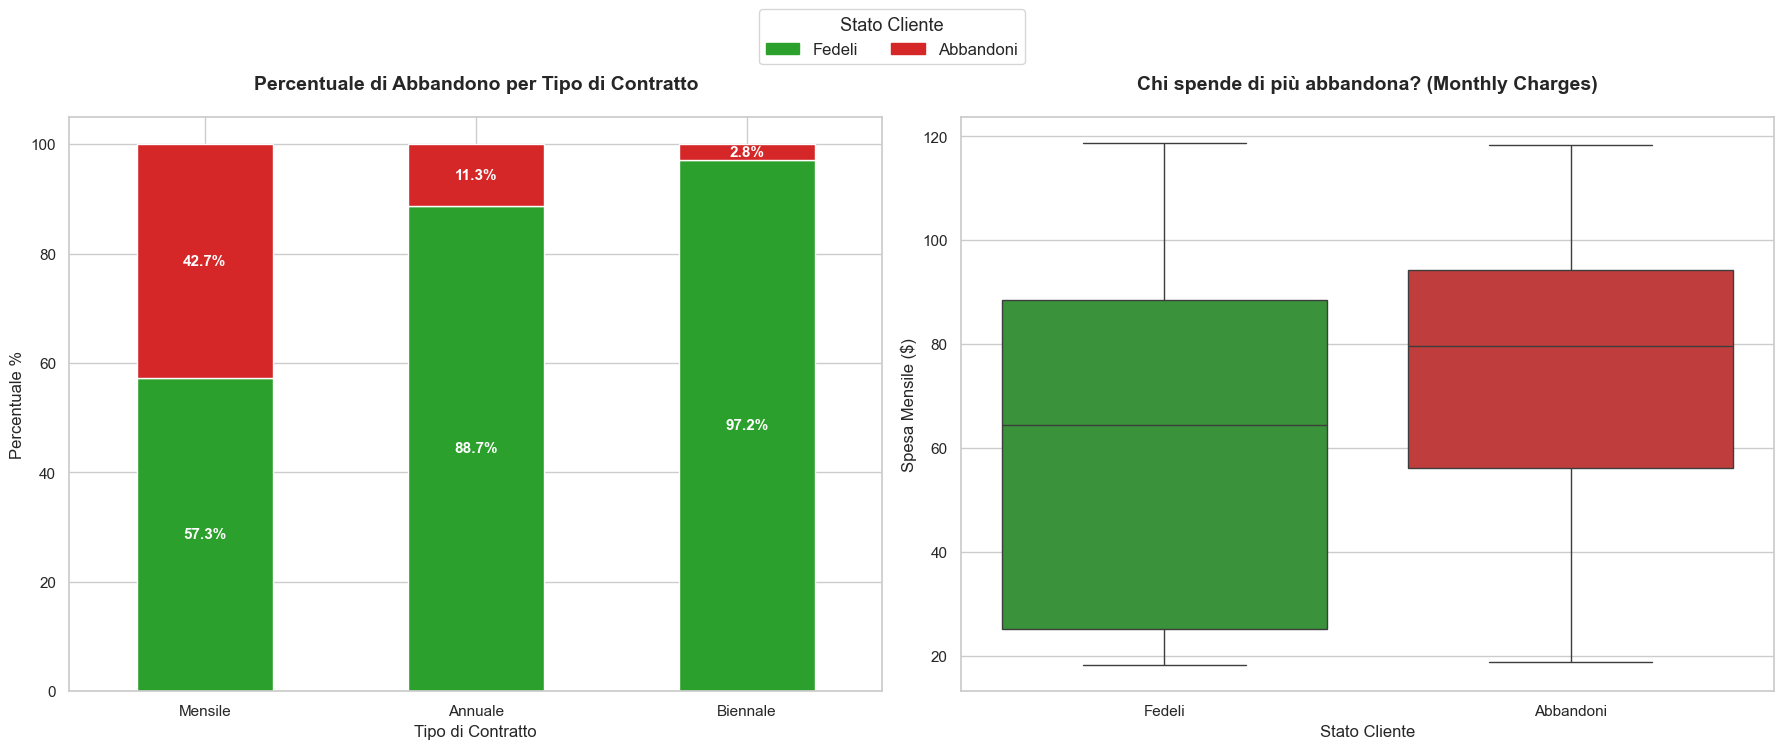

In [20]:
churn_palette = {"Abbandoni": "#D62728", "Fedeli": "#2CA02C"}
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Mappiamo i valori per il grafico senza modificare il dataframe originale
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].map({'No': 'Fedeli', 'Yes': 'Abbandoni'})

# --- GRAFICO 1: Impatto del Contratto (Percentuale) ---
    # .unstack() Prende l'ultimo livello dell'indice (in questo caso 'Churn', cioè 'Yes'/'No') e lo sposta ("ruota") sulle colonne.
contract_churn = df_plot.groupby(['Contract', 'Churn']).size().unstack()

# Calcolo percentuali
contract_churn_pct = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100

# Riordiniamo colonne
contract_churn_pct = contract_churn_pct[['Fedeli', 'Abbandoni']]

# Plot Stacked Bar
contract_churn_pct.plot(kind='bar', stacked=True, color=[churn_palette['Fedeli'], churn_palette['Abbandoni']], ax=ax[0], legend=False)

ax[0].set_title('Percentuale di Abbandono per Tipo di Contratto', fontsize=14, fontweight='bold', pad=20)
ax[0].set_ylabel('Percentuale %', fontsize=12)
ax[0].set_xlabel('Tipo di Contratto', fontsize=12)
ax[0].set_xticklabels(['Mensile', 'Annuale', 'Biennale'], rotation=0)

# Etichette percentuali
for c in ax[0].containers:
    ax[0].bar_label(c, fmt='%.1f%%', label_type='center', color='white', weight='bold', fontsize=11)

# --- GRAFICO 2: Impatto della Spesa (Boxplot) ---
sns.boxplot(data=df_plot, x='Churn', y='MonthlyCharges', hue='Churn', palette=churn_palette, order=['Fedeli', 'Abbandoni'], ax=ax[1], legend=False)
ax[1].set_title('Chi spende di più abbandona? (Monthly Charges)', fontsize=14, fontweight='bold', pad=20)
ax[1].set_xlabel('Stato Cliente', fontsize=12)
ax[1].set_ylabel('Spesa Mensile ($)', fontsize=12)

# --- LEGENDA COMUNE ---
handles = [mpatches.Patch(color=churn_palette['Fedeli'], label='Fedeli'), mpatches.Patch(color=churn_palette['Abbandoni'], label='Abbandoni')]
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=2, fontsize=12, title="Stato Cliente", title_fontsize=13)

plt.tight_layout()
plt.show()

***Risultato: Trappola del Mensile e Paradosso del Valore***
I due grafici svelano le cause economiche dell'abbandono:

1.  **La Trappola del "Month-to-Month":** Guardate la prima colonna del grafico a barre. È quasi per metà rossa (**42.7%** di churn). Confrontatela con i contratti a due anni (ultima colonna), che sono verdi al **97.2%**. Il vincolo contrattuale è il più forte antidoto all'abbandono.
    
2.  **Il Paradosso dei "Ricchi":** Il boxplot a destra mostra un dato controintuitivo. Il box rosso è posizionato più in alto di quello verde.
    * Mediana chi abbandona: **~$80**
    * Mediana chi resta: **~$64**
    
    L'azienda sta perdendo i clienti "High-Value" (alto valore). Chi spende di più è più esigente e più propenso a cambiare operatore, probabilmente attratto da offerte competitor.

---

## 3. Clustering (Segmentazione Clienti)

**Obiettivo:** Oltre alla semplice predizione dell'abbandono, vogliamo identificare profili di clienti simili per definire strategie di marketing personalizzate.

Utilizzeremo l'algoritmo **K-Means** (apprendimento non supervisionato) focalizzandoci sulle due leve strategiche emerse dall'EDA:
1.  **Tenure (Fedeltà):** Anzianità del cliente.
2.  **MonthlyCharges (Valore):** Capacità di spesa mensile.

### 3.1 Preparazione Dati


In [8]:
# Selezioniamo le 2 variabili per il clustering
X_cluster = df[['tenure', 'MonthlyCharges']]

# Scaliamo i dati (StandardScaler: media=0, dev.std=1)
    # Il K-Means è sensibile alla scala (usa la distanza euclidea), quindi lo scaling è obbligatorio
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("Dati scalati e pronti per il clustering")

Dati scalati e pronti per il clustering


### 3.2 Determinazione del numero ottimale di Cluster (Elbow Method)
Il K-Means richiede di specificare a priori il numero di cluster ($K$). Per trovare il $K$ ottimale, usiamo il **Metodo del Gomito (Elbow Method)**: calcoliamo la somma dei quadrati delle distanze intra-cluster (Inerzia) al variare di $K$ e cerchiamo il punto in cui la curva inizia ad appiattirsi (il "gomito").

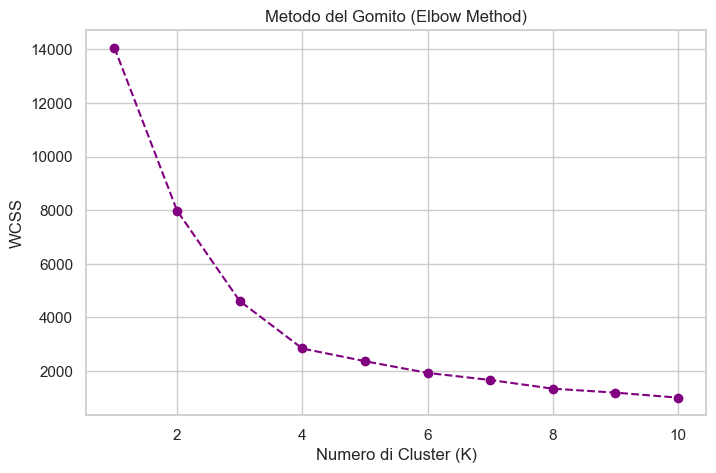

In [9]:
# Calcolo dell'inerzia (WCSS) per K da 1 a 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Grafico Metodo del Gomito
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple')
plt.title('Metodo del Gomito (Elbow Method)')
plt.xlabel('Numero di Cluster (K)')
plt.ylabel('WCSS')
plt.show()

***Scelta Ottimale di K***
*   **Elbow Point:** La curva dell'inerzia si appiattisce significativamente dopo **K=3**.
*   **Decisione:** Si procede con la creazione di **3 segmenti** di clientela, un compromesso ideale tra granularità dell'analisi e interpretabilità del modello.

In [10]:
# Applichiamo K-Means (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segmento'] = kmeans.fit_predict(X_cluster_scaled)

# Assegnazione etichette
profilo_cluster = df.groupby('Segmento')[['tenure', 'MonthlyCharges']].mean()
media_permanenza_globale = df['tenure'].mean()
media_spesa_globale = df['MonthlyCharges'].mean()

def assegna_etichetta_cluster(row):
    # Estraiamo le caratteristiche medie del cluster di appartenenza
    permanenza_cluster = profilo_cluster.loc[row['Segmento'], 'tenure']
    spesa_cluster = profilo_cluster.loc[row['Segmento'], 'MonthlyCharges']
    
    if permanenza_cluster < media_permanenza_globale * 0.5:
        return 'Nuovi Clienti'
    elif spesa_cluster > media_spesa_globale and permanenza_cluster > media_permanenza_globale:
        return 'Clienti Fedeli'
    else:
        return 'Clienti Standard'

df['Etichetta_Segmento'] = df.apply(assegna_etichetta_cluster, axis=1)

display(df.groupby('Etichetta_Segmento')[['tenure', 'MonthlyCharges']].mean().round(0).astype(int).rename(columns={'tenure':'Mesi Permanenza', 'MonthlyCharges':'Costo Mensile'}))

,Mesi Permanenza,Costo Mensile
Etichetta_Segmento,,
Clienti Fedeli,58,89
Clienti Standard,29,26
Nuovi Clienti,13,75


### 3.3 Visualizzazione dei segmenti
Visualizziamo i cluster risultanti su un grafico a dispersione (Scatter Plot) per osservarne la distribuzione spaziale rispetto a Fedeltà e Spesa.

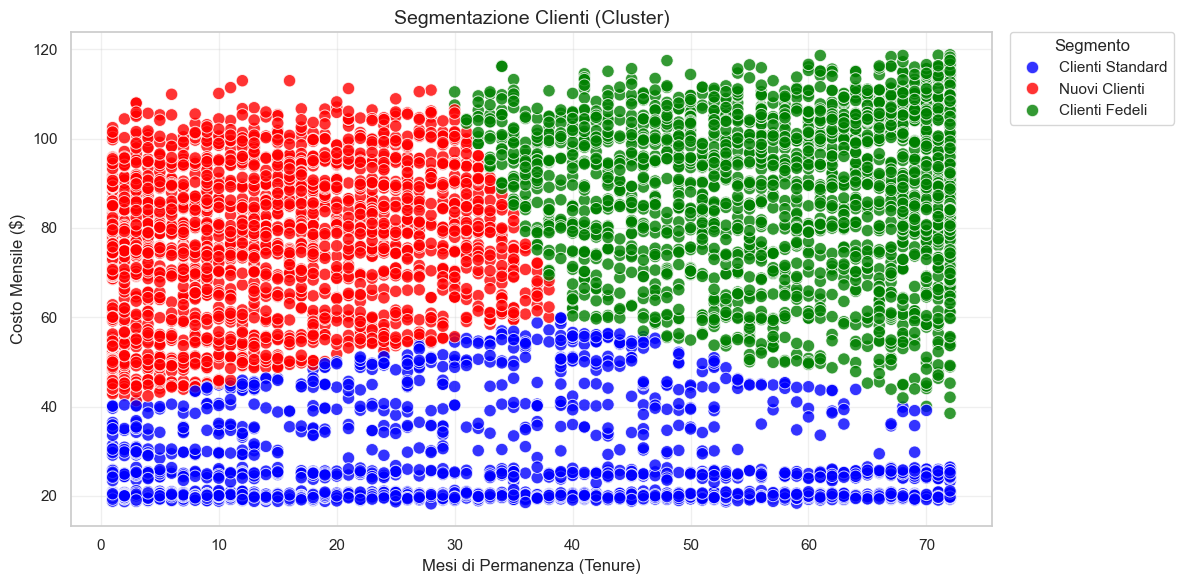

In [11]:
segment_colors = {
    'Clienti Fedeli': 'green',
    'Nuovi Clienti': 'red',
    'Clienti Standard': 'blue'
}

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, 
    x='tenure', 
    y='MonthlyCharges', 
    hue='Etichetta_Segmento', 
    palette=segment_colors, 
    s=80, 
    alpha=0.8
)

plt.title('Segmentazione Clienti (Cluster)', fontsize=14)
plt.xlabel('Mesi di Permanenza (Tenure)')
plt.ylabel('Costo Mensile ($)')
plt.grid(True, alpha=0.3)
plt.legend(title='Segmento', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

***Analizzando i centroidi e la distribuzione, emergono tre profili strategici:***
1.  🔴 **"I Nuovi Alto-Spendenti" (ALTO RISCHIO):**
    * **Identikit:** È il segmento più critico. Clienti recenti (**Tenure media: ~12 mesi**) ma con una capacità di spesa molto alta (**~$75/mese**).
    * **Azione:** Questi clienti generano molto valore ma sono volatili. Necessitano di onboarding assistito e offerte vincolanti (es. sconti su contratti 1-2 anni) per superare la fase critica iniziale.
2.  🟢 **"Clienti Fedeli" (Basso Rischio):**
    * **Identikit:** Fedelissimi. Clienti storici (**Tenure media: ~58 mesi**) con la spesa più elevata in assoluto (**~$90/mese**).
    * **Azione:** Non vanno disturbati con offerte aggressive, ma gratificati con programmi fedeltà per mantenere alto l'engagement ed evitare che guardino alla concorrenza.
3.  🔵 **"Base Standard" (Rischio Medio-Basso):**
    * **Identikit:** Il gruppo più numeroso. Spesa contenuta (**~$26/mese**), spesso associata a servizi base (es. solo DSL/No internet) e tenure variabile.
    * **Azione:** Il margine è basso. L'obiettivo è aumentare gradualmente il valore del cliente proponendo servizi aggiuntivi (Streaming, Backup, Device Protection) senza forzare la mano.

---

## 4. Modellazione Predittiva (Classification)

**Obiettivo:** Addestrare un modello di Machine Learning per prevedere se un cliente abbandonerà (**Churn = 1**) o resterà (**Churn = 0**).

Abbiamo scelto la **Logistic Regression** per questo task. Ecco perché:
1.  **Efficacia:** È un ottimo punto di partenza (baseline) per problemi di classificazione binaria.
2.  **Interpretabilità:** Analizzando i *coefficienti*, possiamo capire quali variabili (es. contratto mensile, fibra ottica) "spingono" il cliente verso l'abbandono.

**Workflow di Analisi:**
1.  **Preprocessing:** Trasformazione delle variabili categoriche in numeri (Label Encoding / Dummy Variables).
2.  **Split:** Divisione training/test (80/20).
3.  **Training:** Addestramento modello.
4.  **Evaluation:** Valutazione performance (Accuracy & Recall).

### 4.1 Preprocessing dei Dati
I modelli di Machine Learning richiedono dati numerici. Dobbiamo quindi trasformare le variabili categoriche:
-   **Label Encoding:** Per variabili binarie (es. *Gender: Male/Female* -> 0/1).
-   **One-Hot Encoding:** Per variabili con più categorie (es. *Contract: Month-to-month, One year...* -> colonne separate).

Inoltre, dividiamo il dataset in **Training Set** (80% dei dati per istruire il modello) e **Test Set** (20% per valutarne le prestazioni).

In [12]:
df_model = df.copy()

# Rimuoviamo le colonne del Clustering per non influenzare la previsione
cols_to_drop = ['Segmento', 'Etichetta_Segmento']
df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns], inplace=True)

# Trasformiamo la variabile target 'Churn' in numeri: 1 per chi abbandona, 0 per chi resta
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})

# One-Hot Encoding: Trasformiamo le variabili categoriche in colonne binarie
    # 'drop_first=True' serve a evitare la ridondanza (multicollinearità)
df_model = pd.get_dummies(df_model, drop_first=True)

# 4. Split Features/Target:
    # X = Variabili indipendenti (il 'materiale di studio' del modello)
    # y = Variabile target (la 'risposta giusta' da prevedere)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# 5. Split Train/Test (80/20): 80% per addestrare, 20% per valutare se ha imparato bene
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dati pronti per il modello")
print(f"Dimensioni Training Set: {X_train.shape}")
print(f"Dimensioni Test Set: {X_test.shape}")

Dati pronti per il modello
Dimensioni Training Set: (5625, 30)
Dimensioni Test Set: (1407, 30)


### 4.2 Feature Scaling (Normalizzazione)
La **Logistic Regression** è un algoritmo basato sull'ottimizzazione (Discesa del Gradiente) ed è quindi sensibile alla scala delle variabili numeriche.
Se le feature hanno ordini di grandezza molto diversi (es. `tenure` [0-72] vs `TotalCharges` [0-8000]), l'algoritmo fatica a convergere e i pesi (coefficienti) assegnati alle variabili non sono direttamente confrontabili.

**Soluzione:** Utilizziamo lo **StandardScaler** per standardizzare i dati numerici ($z = \frac{x - \mu}{\sigma}$), portandoli ad avere media 0 e deviazione standard 1.

In [13]:
# Selezioniamo solo le colonne numeriche da scalare
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# Sul Train Set usiamo fit_transform: il modello impara media e deviazione standard dai dati di training
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Sul Test Set usiamo SOLO transform: usiamo la media/dev.std imparate dal train per simulare dati mai visti
    # Questo evita il "Data Leakage" (non dobbiamo sapere nulla del test set durante il training)
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Scaling completato")

Scaling completato


### 4.3 Addestramento del Modello
Addestriamo il modello sui dati di training. Il modello imparerà la relazione tra le caratteristiche del cliente (X) e la decisione di abbandono (y).

In [14]:
# Creazione e Addestramento
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predizione sul Test Set
y_pred = log_reg.predict(X_test)

# Accuratezza semplice
acc = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello: {acc*100:.2f}%")

Accuratezza del modello: 78.68%


### 4.4 Valutazione delle Performance
Valutiamo il modello sul Test Set (dati mai visti). Oltre all'**Accuratezza** (percentuale di risposte corrette), analizzeremo:
-   **Matrice di Confusione:** Per vedere quanti falsi positivi e falsi negativi facciamo.
-   **Precision & Recall:** Fondamentali dato che il dataset è sbilanciato.

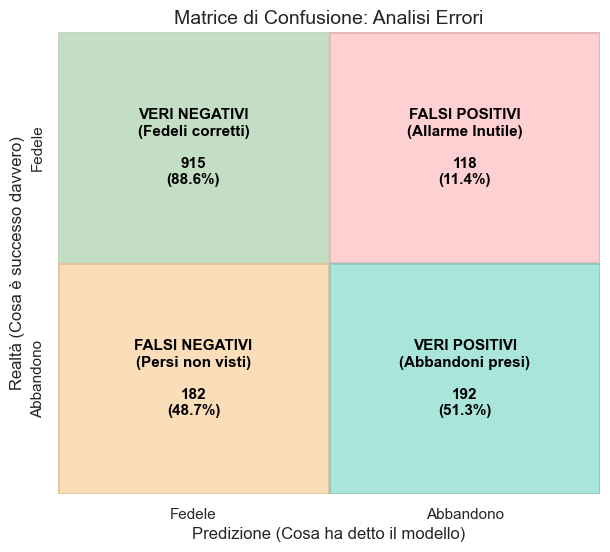

,Precisione %,Richiamo/Sensibilità %,F1-Score %,Supporto (N)
Fedele,83.41,88.58,85.92,1033
Abbandono,61.94,51.34,56.14,374
Accuratezza Generale,78.68,78.68,78.68,1
Media Macro,72.67,69.96,71.03,1407
Media Ponderata,77.70,78.68,78.00,1407


In [15]:
plt.figure(figsize=(7, 6))

# Calcolo della matrice grezza (conteggi)
cm = confusion_matrix(y_test, y_pred)
# Calcolo delle percentuali per riga (utile per vedere la "Recall" di ogni classe)
cm_percentages = cm / cm.sum(axis=1)[:, np.newaxis]

# --- Definizione Colori Semantici ---
    # TP (Veri Positivi) e TN (Veri Negativi) -> Verde (Bene)
    # FP (Falsi Positivi) -> Rosso Chiaro (Errore meno grave)
    # FN (Falsi Negativi) -> Arancione (Errore GRAVE: cliente perso non visto)
colors = [['#d9f2d0', '#ffcccc'],  # Riga 0: TN (Verde), FP (Rosso)
          ['#ffdbb3', '#a3e4d7']]  # Riga 1: FN (Arancione), TP (Verde)]

# --- Creazione Plot ---
# heatmap base che nasconde i colori automatici disegnandoci sopra
ax = sns.heatmap(cm, annot=False, cbar=False, cmap='Blues', linewidths=1, linecolor='black')

# Sovrascrive ogni cella con rettangoli colorati
for i in range(2):
    for j in range(2):
        # Disegna il rettangolo colorato
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=colors[i][j], alpha=0.9, lw=0))
        
        # Prepara il testo con Conteggio e Percentuale
        val = cm[i, j]
        pct = cm_percentages[i, j]
    
        if i==0 and j==0: text = f"VERI NEGATIVI\n(Fedeli corretti)\n\n{val}\n({pct:.1%})"
        elif i==0 and j==1: text = f"FALSI POSITIVI\n(Allarme Inutile)\n\n{val}\n({pct:.1%})"
        elif i==1 and j==0: text = f"FALSI NEGATIVI\n(Persi non visti)\n\n{val}\n({pct:.1%})"
        elif i==1 and j==1: text = f"VERI POSITIVI\n(Abbandoni presi)\n\n{val}\n({pct:.1%})"
        
        # Inserisce il testo al centro della cella
        ax.text(j+0.5, i+0.5, text, ha='center', va='center', fontsize=11, weight='bold', color='black')

plt.title('Matrice di Confusione: Analisi Errori', fontsize=14)
plt.ylabel('Realtà (Cosa è successo davvero)')
plt.xlabel('Predizione (Cosa ha detto il modello)')
plt.xticks([0.5, 1.5], ['Fedele', 'Abbandono'])
plt.yticks([0.5, 1.5], ['Fedele', 'Abbandono'])
plt.show()

# --- Report Metriche Dettagliato ---
# Converte il report testuale in DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

df_report.rename(index={'0': 'Fedele', '1': 'Abbandono', 'accuracy': 'Accuratezza Generale', 
                        'macro avg': 'Media Macro', 'weighted avg': 'Media Ponderata'}, 
                 columns={'precision': 'Precisione %', 'recall': 'Richiamo/Sensibilità %', 
                          'f1-score': 'F1-Score %', 'support': 'Supporto (N)'}, inplace=True)

# Convertiamo valori in percentuali
cols_pct = ['Precisione %', 'Richiamo/Sensibilità %', 'F1-Score %']
df_report[cols_pct] = df_report[cols_pct] * 100

display(df_report.style.format("{:.2f}", subset=cols_pct).format("{:.0f}", subset=['Supporto (N)']))

### 4.5 Feature Importance (Quali fattori guidano il Churn?)
Analizzando i coefficienti del modello, possiamo capire quali variabili aumentano o diminuiscono la probabilità di abbandono.
-   **Coefficienti Positivi (Barre Rosse):** Aumentano il rischio di Churn.
-   **Coefficienti Negativi (Barre Verdi):** Proteggono dal Churn (aumentano la fedeltà).

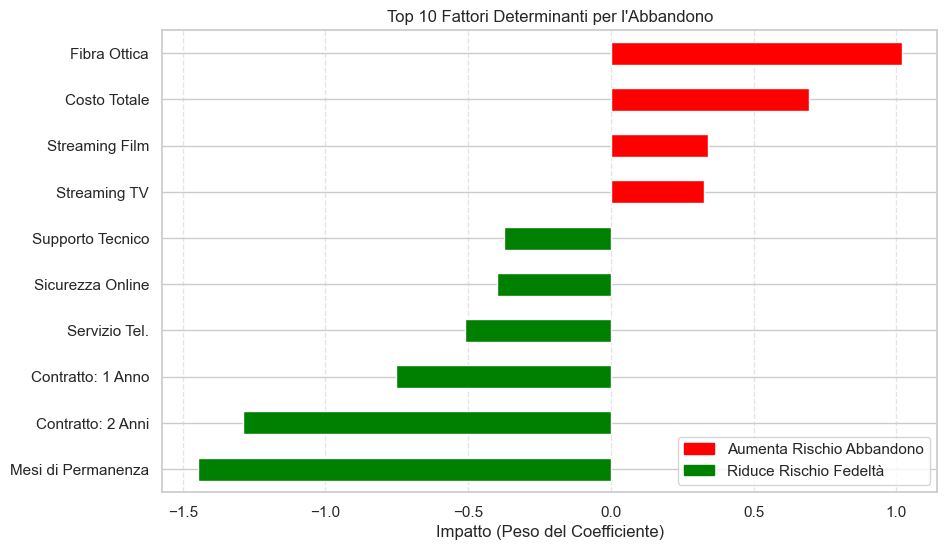

In [16]:
# Estrazione dei coefficienti
weights = pd.Series(log_reg.coef_[0], index=X.columns)

col_map = {
    'tenure': 'Mesi di Permanenza',
    'MonthlyCharges': 'Costo Mensile',
    'TotalCharges': 'Costo Totale',
    'gender_Male': 'Uomo',
    'SeniorCitizen': 'Anziano',
    'Partner_Yes': 'Partner (Sì)',
    'Dependents_Yes': 'Familiari a Carico',
    'PhoneService_Yes': 'Servizio Tel.',
    'MultipleLines_Yes': 'Linee Multiple',
    'InternetService_Fiber optic': 'Fibra Ottica',
    'InternetService_No': 'No Internet',
    'OnlineSecurity_Yes': 'Sicurezza Online',
    'OnlineBackup_Yes': 'Backup Online',
    'DeviceProtection_Yes': 'Protezione Dispositivo',
    'TechSupport_Yes': 'Supporto Tecnico',
    'StreamingTV_Yes': 'Streaming TV',
    'StreamingMovies_Yes': 'Streaming Film',
    'Contract_One year': 'Contratto: 1 Anno',
    'Contract_Two year': 'Contratto: 2 Anni',
    'PaperlessBilling_Yes': 'Fattura Digitale',
    'PaymentMethod_Credit card (automatic)': 'Pagam.: Carta di Credito',
    'PaymentMethod_Electronic check': 'Pagam.: Assegno Elettronico',
    'PaymentMethod_Mailed check': 'Pagam.: Assegno Postale'
}

# Rinomina l'indice (se una feature non è nel dizionario, mantiene il nome originale)
weights.index = [col_map.get(x, x) for x in weights.index]

# --- Selezione dei Top 10 Fattori più Influenti ---
# Spiegazione logica:
# 1. weights.abs(): Consideriamo il valore assoluto perché ci interessa la forza dell'impatto, 
#    indipendentemente se positivo (aumenta churn) o negativo (riduce churn).
# 2. argsort(): Ottieniamo gli indici che ordinerebbero la serie.
# 3. iloc[...]: Riordiniamo la serie originale usando questi indici.
# 4. head(10): Prendiamo i primi 10 (i più forti in assoluto).
# 5. sort_values(): Li riordiniamo dal più piccolo al più grande SOLO per l'estetica del grafico a barre.
top_weights = weights.iloc[(-weights.abs()).argsort()].head(10).sort_values()

# colori legenda
red_patch = mpatches.Patch(color='red', label='Aumenta Rischio Abbandono')
green_patch = mpatches.Patch(color='green', label='Riduce Rischio Fedeltà')

plt.figure(figsize=(10, 6))
colors = ['red' if x > 0 else 'green' for x in top_weights]
top_weights.plot(kind='barh', color=colors)
plt.legend(handles=[red_patch, green_patch], loc='lower right')
plt.title('Top 10 Fattori Determinanti per l\'Abbandono')
plt.xlabel('Impatto (Peso del Coefficiente)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

---

## 5. Conclusioni e Raccomandazioni Strategiche

### 5.1 Sintesi dei Risultati
L'analisi ha permesso di identificare i **key driver del churn** e di segmentare la customer base in profili di rischio distinti.

*   **Tasso di Abbandono (Global Churn):** **26.6%**.
*   **Fattori Critici:** I clienti più a rischio sono caratterizzati da **contratti mensili**, utilizzo della **Fibra Ottica** e pagamenti digitali. È emerso un paradosso: i clienti "alto-spendenti" sono spesso quelli più propensi all'abbandono.
*   **Tempistica del Rischio:** La fase critica sono i primi **6 mesi**. Superato il primo anno ("scoglio del rinnovo"), la fedeltà aumenta drasticamente.

### 5.2 Performance del Modello
Il modello di **Logistic Regression** ha raggiunto un'accuratezza del **~79%**.
*   **Punti di forza:** Eccellente interpretabilità. I coefficienti hanno confermato che i contratti a lungo termine (1-2 anni) sono il più forte deterrente contro il churn.
*   **Aree di miglioramento:** La capacità di individuare tutti i clienti a rischio (Recall) può essere potenziata in futuro testando modelli ensemble (es. Random Forest, XGBoost) o tecniche di bilanciamento (SMOTE).

### 5.3 Piano d'Azione Strategico
Sulla base dei dati, si raccomandano le seguenti azioni prioritarie:

1.  **Programma "Onboarding 6 Mesi":** Creare un percorso dedicato ai nuovi clienti con check-up periodici e sconti progressivi per superare la fase critica del primo semestre.
2.  **Migrazione Contrattuale Attiva:** Incentivare i clienti "Month-to-month" a passare a piani annuali offrendo un mese gratuito o upgrade del servizio. Questo singolo intervento abbatterebbe drasticamente il rischio.
3.  **Task Force "Fibra & Alto Valore":** Il Cluster 1 (Nuovi Alto-Spendenti) è vitale per il fatturato ma fragile. Indagare su potenziali problemi tecnici della rete Fibra e offrire a questo segmento un canale di assistenza prioritario ("VIP Support") per giustificare il prezzo premium.